In [309]:
#from master import MASTERModel
from master_strategy import MASTERModel
import pickle
import numpy as np
import time
import pandas as pd
import sys, os
import qlib
from qlib.data.dataset import TSDataSampler
from bisect import bisect_right

# Move up one directory from MASTER-master
parent_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(parent_dir)


from alpha_101.alpha_generator import get_alpha101_table_from_db
from alpha_101.alpha_generator import generate_alphas
from alpha_101.alpha_generator import get_sentiment_table_from_db

In [195]:
df_sentiment, df_sentiment_filter = get_sentiment_table_from_db()

In [ ]:
import pandas as pd

# Ensure the 'Date' column is in datetime format.
df_sentiment['Date'] = pd.to_datetime(df_sentiment['Date'])

# Get the sorted unique dates and tickers from df_sentiment.
unique_dates = sorted(df_sentiment['Date'].unique())
unique_tickers = sorted(df_sentiment['Ticker'].unique())

# Create a complete MultiIndex with all combinations of Date and Ticker.
full_index = pd.MultiIndex.from_product([unique_dates, unique_tickers], names=['Date', 'Ticker'])

# Set the DataFrame index to ['Date', 'Ticker'].
df_sentiment_indexed = df_sentiment.set_index(['Date', 'Ticker'])

# Reindex to the full index, filling missing rows with 0.
df_sentiment_filled = df_sentiment_indexed.reindex(full_index, fill_value=0).reset_index()



,Date,Ticker,Positive,Negative,Neutral,Surprise,Joy,Anger,Fear,Sadness,Disgust,Intent Sentiment
0,2022-01-01,$AEP,0.35981482639908774,0.05698536522686489,0.5831998214125632,0.3862604540226515,0.44652951048343603,0.06190442807476175,0.0477963268600902,0.039425760301252596,0.018083520257807965,buy
1,2022-01-01,$AMGN,0.08725716147039617,0.028366747179201658,0.8843761001314435,0.15994861097933333,0.47867446780081996,0.08674874808394202,0.20340698296282134,0.06144912896205617,0.009772061211026981,neutral
2,2022-01-01,$AMZN,0.09654277190566074,0.08134140871051286,0.822115825282203,0.1535688112956759,0.38607260691622436,0.1112454997266979,0.15214649146818526,0.18522763538880158,0.011738955204414928,neutral
3,2022-01-01,$AVGO,0.13700131123716192,0.04611742132428018,0.8168812624432824,0.2883002687787149,0.5667897582475201,0.06839181667086071,0.02366436469650781,0.04181317699255132,0.011040614613845407,neutral
4,2022-01-01,$BIIB,0.2956596757867372,0.16062566800974304,0.5437146419426426,0.3018099128372998,0.3461276305585098,0.14147879756094603,0.0994103419418514,0.10544623509847059,0.005727082002922481,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...
79690,2025-02-28,ASML,0.12072128176011822,0.13133665733039374,0.7479420673440803,0.08868153352740761,0.36753965647145753,0.2441648734318285,0.2135331814131949,0.07753245208568026,0.008548303070431364,neutral
79691,2025-02-28,AXON,0.18699365146458152,0.13383376365527505,0.6791725836694241,0.08753767432027096,0.5048267662359668,0.14479083792193861,0.1514247341594001,0.10555415207924121,0.0058658352831825,neutral
79692,2025-02-28,AZN,0.39380184374749666,0.03844402600079773,0.567754116654396,0.23209576644880578,0.43349151647004935,0.14099037308546902,0.051260807482755785,0.12639640484981465,0.015765131663105243,neutral
79693,2025-02-28,GOOGL,0.16608458268456167,0.15839703613892192,0.6755183706060052,0.3210113044913156,0.4591638814241496,0.11626499981241083,0.01698540920171252,0.07068322551001735,0.015891179560394264,neutral


In [205]:
df_sentiment_filled['Ticker'] = df_sentiment_filled['Ticker'].str.replace(r'\$', '', regex=True)


In [4]:
# Call generate_alphas() which returns (df, final_df)
df, final_df = generate_alphas(input_schema = 'datacollection',
                    input_table_name = 'stock_data',
                    save = True, 
                    output_schema = 'datacollection',
                    output_table_name = 'alpha101',
                    if_return = True)

Running function alpha001 for ADBE...
Running function alpha002 for ADBE...
Running function alpha003 for ADBE...
Running function alpha004 for ADBE...
Running function alpha006 for ADBE...
Running function alpha007 for ADBE...
Running function alpha008 for ADBE...
Running function alpha009 for ADBE...
Running function alpha010 for ADBE...
Running function alpha011 for ADBE...
Running function alpha012 for ADBE...
Running function alpha013 for ADBE...
Running function alpha014 for ADBE...
Running function alpha015 for ADBE...
Running function alpha016 for ADBE...
Running function alpha017 for ADBE...
Running function alpha018 for ADBE...
Running function alpha019 for ADBE...
Running function alpha020 for ADBE...
Running function alpha021 for ADBE...
Running function alpha022 for ADBE...
Running function alpha023 for ADBE...
Running function alpha024 for ADBE...
Running function alpha025 for ADBE...
Running function alpha026 for ADBE...
Running function alpha028 for ADBE...
Running func

/Users/lilingyan/QF5214_2025_G8/TeamThree/qlib_env/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Running function alpha028 for BIIB...
Running function alpha029 for BIIB...
Running function alpha030 for BIIB...
Running function alpha031 for BIIB...
Running function alpha032 for BIIB...
Running function alpha033 for BIIB...
Running function alpha034 for BIIB...
Running function alpha035 for BIIB...
Running function alpha036 for BIIB...
Running function alpha037 for BIIB...
Running function alpha038 for BIIB...
Running function alpha039 for BIIB...
Running function alpha040 for BIIB...
Running function alpha041 for BIIB...
Running function alpha042 for BIIB...
Running function alpha043 for BIIB...
Running function alpha044 for BIIB...
Running function alpha045 for BIIB...
Running function alpha046 for BIIB...
Running function alpha047 for BIIB...
Running function alpha048 for BIIB...
Running function alpha049 for BIIB...
Running function alpha050 for BIIB...
Running function alpha051 for BIIB...
Running function alpha052 for BIIB...
Running function alpha053 for BIIB...
Running func

In [135]:
df_all, final_df_all, df_index = get_alpha101_table_from_db()

In [136]:
company_list = company_list = ["ADBE", "AMD", "ABNB", "GOOGL", "GOOG", "AMZN", "AEP", "AMGN", 
"ADI", "ANSS", "AAPL", "AMAT", "APP", "ASML", "AZN", 
"TEAM", "ADSK", "ADP", "AXON", "BKR", "BIIB", "BKNG", "AVGO", 
"CDNS", "CDW", "CHTR", "CTAS", "CSCO", "CCEP", "CTSH", "CMCSA", 
"CPRT", "CSGP", "COST", "CRWD", "CSX", "DDOG", "DXCM","VRTX", "WBD", "WDAY", "XEL", "ZS","QCOM", 
"REGN", "ROP", "ROST", "FAST", "FTNT", "GILD" ,"ON", "PCAR", "PLTR", "PANW","PAYX", "PYPL", 
"PDD", "PEP","SBUX", "SNPS", "TTWO", "TMUS","TSLA", "TXN", "TTD", "VRSK"] 

'''
company_list = company_list = ["ADBE", "AMD", "ABNB", "GOOGL", "GOOG", "AMZN", "AEP", "AMGN", 
"ADI", "ANSS", "AAPL", "AMAT", "APP", "ARM", "ASML", "AZN", 
"TEAM", "ADSK", "ADP", "AXON", "BKR", "BIIB", "BKNG", "AVGO", 
"CDNS", "CDW", "CHTR", "CTAS", "CSCO", "CCEP", "CTSH", "CMCSA", 
"CEG", "CPRT", "CSGP", "COST", "CRWD", "CSX", "DDOG", "DXCM","VRTX", "WBD", "WDAY", "XEL", "ZS","QCOM", 
"REGN", "ROP", "ROST", "FAST", "FTNT", "GEHC", "GILD" ,"ON", "PCAR", "PLTR", "PANW","PAYX", "PYPL", 
"PDD", "PEP","SBUX", "SNPS", "TTWO", "TMUS","TSLA", "TXN", "TTD", "VRSK"]      '''


'\ncompany_list = company_list = ["ADBE", "AMD", "ABNB", "GOOGL", "GOOG", "AMZN", "AEP", "AMGN", \n"ADI", "ANSS", "AAPL", "AMAT", "APP", "ARM", "ASML", "AZN", \n"TEAM", "ADSK", "ADP", "AXON", "BKR", "BIIB", "BKNG", "AVGO", \n"CDNS", "CDW", "CHTR", "CTAS", "CSCO", "CCEP", "CTSH", "CMCSA", \n"CEG", "CPRT", "CSGP", "COST", "CRWD", "CSX", "DDOG", "DXCM","VRTX", "WBD", "WDAY", "XEL", "ZS","QCOM", \n"REGN", "ROP", "ROST", "FAST", "FTNT", "GEHC", "GILD" ,"ON", "PCAR", "PLTR", "PANW","PAYX", "PYPL", \n"PDD", "PEP","SBUX", "SNPS", "TTWO", "TMUS","TSLA", "TXN", "TTD", "VRSK"]      '

In [206]:
# Ensure the Date column is in datetime format.
df_all['Date'] = pd.to_datetime(df_all['Date'])
final_df_all['Date'] = pd.to_datetime(final_df_all['Date'])
df_index['Date'] = pd.to_datetime(df_index['Date'])
df_sentiment_filled['Date'] = pd.to_datetime(df_sentiment_filled['Date'])

# Filter the DataFrame: select rows where Date is on or before 2025-02-28.
filtered_df_all = df_all[df_all['Date'] <= pd.Timestamp('2025-02-28')]
filtered_final_df_all = final_df_all[final_df_all['Date'] <= pd.Timestamp('2025-02-28')]
filtered_df_index = df_index[df_index['Date'] <= pd.Timestamp('2025-02-28')]
filtered_df_sentiment = df_sentiment_filled[df_sentiment_filled['Date'] <= pd.Timestamp('2025-02-28')]

In [207]:
filtered_df_all = filtered_df_all[filtered_df_all['Ticker'].isin(company_list)]
filtered_final_df_all = filtered_final_df_all[filtered_final_df_all['Ticker'].isin(company_list)]
filtered_df_sentiment = filtered_df_sentiment[filtered_df_sentiment['Ticker'].isin(company_list)]

In [208]:
filtered_df_all.to_csv("df_all.csv", index=False)
filtered_final_df_all.to_csv("final_df_all.csv", index=False)
filtered_df_index.to_csv("df_index.csv", index=False)
filtered_df_sentiment.to_csv("filtered_df_sentiment.csv", index=False)


In [209]:
filtered_df_all = pd.read_csv("df_all.csv")
filtered_final_df_all = pd.read_csv("final_df_all.csv")
filtered_df_index = pd.read_csv("df_index.csv")
filtered_df_sentiment = pd.read_csv("filtered_df_sentiment.csv")

In [210]:
# 1) Drop the "IndexTicker" and "Volume" column if it exists
filtered_df_index = filtered_df_index.drop(columns="IndexTicker", errors="ignore")
filtered_df_index = filtered_df_index.drop(columns="Volume", errors="ignore")

# 2) Pivot the DataFrame
df_index_pivot = filtered_df_index.pivot(
    index="Date",                # Each Date becomes a row
    columns="IndexName",         # Each unique IndexName becomes columns
    values=["Open", "High", "Low", "Close", "Adj_Close"]
)

# 3) Flatten and rename columns to single-level format "<IndexName>_<Column>"
df_index_pivot.columns = [
    f"{col[1]}_{col[0]}"  # col is a tuple like ("Open", "S&P500")
    for col in df_index_pivot.columns
]

# 4) Move the 'Date' index back into a column
df_index_pivot.reset_index(inplace=True)

# Now df_index_pivot has columns like:
# ['Date', 'S&P500_Open', 'S&P500_High', 'S&P500_Low', 'S&P500_Close', 'S&P500_Adj_Close', 'S&P500_Volume', ...]

# Merge on "Date" and "Ticker" (adjust join type if needed)
combined_df = pd.merge(filtered_df_all, filtered_final_df_all, on=["Date", "Ticker"], how="inner")

# 5) (Optional) Merge with your main DataFrame on 'Date'
df_merged = pd.merge(
    combined_df,
    df_index_pivot,
    on='Date',    # or how='left'/'right'/'outer' if needed
    how='left'    
)


df_merged.fillna(0, inplace=True)

# Example of dropping non-numeric columns:
filtered_df_merged = df_merged.drop(columns=["IndClass_Sector", "IndClass_Industry"])

In [211]:
filtered_df_sentiment = filtered_df_sentiment.drop(columns=["Intent Sentiment"])

for col in filtered_df_sentiment.columns:
    if col not in ['Date', 'Ticker']:
        filtered_df_sentiment[col] = pd.to_numeric(filtered_df_sentiment[col], errors='coerce')

In [212]:
# Get the sorted unique trading dates from df_merged.
trading_dates = sorted(df_merged['Date'].unique())
    
combined_sent_list = []

In [213]:
# Process each ticker separately.
tickers = filtered_df_merged['Ticker'].unique()
for ticker in tickers:
    # Subset sentiment data for this ticker.
    df_sent_ticker = filtered_df_sentiment[filtered_df_sentiment['Ticker'] == ticker].copy()
    # Loop over each trading date.
    for i, current_date in enumerate(trading_dates):
        if i < len(trading_dates) - 1:
            next_date = trading_dates[i+1]
        else:
            next_date = None
        
        # Define the window: from current_date (inclusive) to next_date (exclusive).
        if next_date is not None:
            window = df_sent_ticker[(df_sent_ticker['Date'] >= current_date) & 
                                        (df_sent_ticker['Date'] < next_date)]
        else:
            window = df_sent_ticker[df_sent_ticker['Date'] >= current_date]
        
        # If there's sentiment data in the window, compute the average.
        if not window.empty:
            # Assume sentiment columns are all except 'Date' and 'Ticker'.
            sentiment_cols = [col for col in window.columns if col not in ['Date', 'Ticker']]
            avg_values = window[sentiment_cols].mean()
            
            # Create a new row with the current trading date, ticker, and averaged sentiment.
            row = {'Date': current_date, 'Ticker': ticker}
            row.update(avg_values.to_dict())
            combined_sent_list.append(row)

In [214]:
# Create a DataFrame from the combined sentiment data.
df_combined_sent = pd.DataFrame(combined_sent_list)

In [225]:
# Drop any rows whose dates are not in df_merged (should be none if we use trading_dates,
    # but we do this for safety).
df_combined_sent = df_combined_sent[df_combined_sent['Date'].isin(filtered_df_merged['Date'])]
    
    

# Merge df_merged with the combined sentiment data.
# Use a left merge so that all trading dates and tickers in df_merged are preserved.
df_final = pd.merge(filtered_df_merged, df_combined_sent, on=['Date', 'Ticker'], how='left')

In [296]:



df_sorted = df_final.sort_values(by='Date').reset_index(drop=True)

In [298]:
df_sorted_shift = df_sorted.sort_values(["Ticker", "Date"])

# 2) Shift the Return column so that row T holds day T+1's label
df_sorted_shift["Return"] = df_sorted_shift.groupby("Ticker")["Return"].shift(-1)

# 3) Drop rows where Return became NaN after shifting
df_sorted_shift.dropna(subset=["Return"], inplace=True)

In [300]:
# Ensure the Date column is datetime type.
df_sorted_shift['Date'] = pd.to_datetime(df_sorted_shift['Date'])

# Get the sorted unique dates.
unique_dates = np.sort(df_sorted_shift['Date'].unique())

# Define split indices based on unique dates.
n_dates = len(unique_dates)
train_date_end = unique_dates[int(n_dates * 0.6)]
valid_date_end = unique_dates[int(n_dates * 0.8)]

# Now split the DataFrame based on the date thresholds.
df_train = df_sorted_shift[df_sorted_shift['Date'] <= train_date_end].copy()
df_valid = df_sorted_shift[(df_sorted_shift['Date'] > train_date_end) & (df_sorted_shift['Date'] <= valid_date_end)].copy()
df_test  = df_sorted_shift[(df_sorted_shift['Date'] > valid_date_end)].copy()


# Optionally, fill missing values.
#df_train.fillna(0, inplace=True)
#df_valid.fillna(0, inplace=True)
#df_test.fillna(0, inplace=True)

# For debugging, you can print the date ranges:
print("Training date range:", df_train['Date'].min(), "-", df_train['Date'].max())
print("Validation date range:", df_valid['Date'].min(), "-", df_valid['Date'].max())
print("Testing date range:", df_test['Date'].min(), "-", df_test['Date'].max())


Training date range: 2022-01-03 00:00:00 - 2023-11-21 00:00:00
Validation date range: 2023-11-22 00:00:00 - 2024-07-11 00:00:00
Testing date range: 2024-07-12 00:00:00 - 2025-02-27 00:00:00


In [301]:
def convert_data_qlibformat(df):
    import pandas as pd
    import numpy as np
    from qlib.data.dataset import TSDataSampler  # adjust import as needed

    # Create a copy to avoid SettingWithCopyWarning
    df = df.copy()
    
    # remove rows with missing "Return" values
    df.dropna(subset=['Return'], inplace=True)
    
    # 1) Ensure the "Date" column is a datetime type
    df["Date"] = pd.to_datetime(df["Date"])
    
    # 2) Separate label and features BEFORE setting the index
    #    Retain "Date" and "Ticker" for indexing, but remove them from features.
    df_label = df[["Return"]].copy()
    # Exclude "Date" and "Ticker" along with "Return" from features
    df_feature = df.drop(columns=["Return", "Date", "Ticker"], errors="ignore")
    
    # 3) Normalize feature columns (ensure they are numeric)
    df_feature = df_feature.apply(pd.to_numeric, errors='coerce')
    feature_mean = df_feature.mean()
    feature_std = df_feature.std()
    eps = 1e-8  # to avoid division by zero
    normalized_feature = (df_feature - feature_mean) / (feature_std + eps)
    df_feature = normalized_feature
    
    # 4) Now set the index of the original DataFrame using "Date" and "Ticker"
    #    These columns will be used as the index ("datetime" and "instrument")
    df_index = df.set_index(["Date", "Ticker"])
    
    # 5) Assign the index to both label and feature DataFrames
    df_feature.index = df_index.index
    df_label.index = df_index.index

    # 6) Construct MultiIndex for the columns:
    #    For features, use top-level "feature"; for the label, use "label"
    df_feature.columns = pd.MultiIndex.from_product([["feature"], df_feature.columns])
    df_label.columns = pd.MultiIndex.from_product([["label"], df_label.columns])
    
    # 7) Concatenate features and label columns, and fill missing values with 0
    df_qlib = pd.concat([df_feature, df_label], axis=1)
    df_qlib = df_qlib.fillna(0)
    
    # 8) Name the index levels and sort the DataFrame
    df_qlib.index.names = ["datetime", "instrument"]
    df_qlib = df_qlib.sort_index(level=["datetime", "instrument"])

    
    # 9) Determine start and end dates from the datetime index level
    start = df_qlib.index.get_level_values("datetime").min()
    end = df_qlib.index.get_level_values("datetime").max()
    
    # 10) Build TSDataSampler (using fillna_type='ffill+bfill' for reindexing)
    sampler = TSDataSampler(df_qlib, start, end, step_len=8, fillna_type='ffill+bfill')
    sampler.data_arr = np.nan_to_num(sampler.data_arr, nan=0.0)
    
    return sampler

# Use the function for training, validation, and test sets:
dl_train = convert_data_qlibformat(df_train)
dl_valid = convert_data_qlibformat(df_valid)
dl_test = convert_data_qlibformat(df_test)


In [302]:
# Save the merged DataFrame tinpuo a pickle file
with open("training_input.pkl", "wb") as f:
    pickle.dump(dl_train, f)
with open("valid_input.pkl", "wb") as f:
    pickle.dump(dl_valid, f)
with open("testing_input.pkl", "wb") as f:
    pickle.dump(dl_test, f)


In [303]:




with open(f'training_input.pkl', 'rb') as f:
    dl_train = pickle.load(f)
with open(f'valid_input.pkl', 'rb') as f:
    dl_valid = pickle.load(f)
with open(f'testing_input.pkl', 'rb') as f:
    dl_test = pickle.load(f)

In [304]:
# After loading:
with open('training_input.pkl', 'rb') as f:
    ts_sampler = pickle.load(f)

print(type(ts_sampler))
print(dir(ts_sampler))
print(ts_sampler.__dict__)

# Extract the data array from the sampler
data_arr = ts_sampler.data_arr

# Convert the data array to a DataFrame
data_df = pd.DataFrame(data_arr)

# Display the DataFrame
print(data_df.head())

# Check for any NaN values in the data array
if np.isnan(data_arr).any():
    print("NaN found in ts_sampler.data_arr")
else:
    print("No NaN found in ts_sampler.data_arr")

<class 'qlib.data.dataset.TSDataSampler'>
['__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slotnames__', '__str__', '__subclasshook__', '__weakref__', '_get_indices', '_get_row_col', 'build_index', 'config', 'data_arr', 'data_index', 'empty', 'end', 'fillna_type', 'flt_idx_map', 'get_index', 'idx_arr', 'idx_df', 'idx_map', 'idx_map2arr', 'nan_idx', 'slice_idx_map_and_data_index', 'start', 'step_len']
{'start': Timestamp('2022-01-03 00:00:00'), 'end': Timestamp('2023-11-21 00:00:00'), 'step_len': 8, 'fillna_type': 'ffill+bfill', 'data_arr': array([[-0.05410935, -0.04598868, -0.04642936, ..., -0.27496841,
        -0.20114885, -0.0126916 ],
       [-0.03865579, -0.04579801, -0.04183452, ..., -0.4

In [305]:
for i, batch in enumerate(dl_train):
    if i == 3:
        print(f"Batch {i}:")
        print("  Type:", type(batch))            # Should be <class 'numpy.ndarray'>
        print("  Shape:", batch.shape)           # e.g. (batch_size, step_len, feature_dim)
        print("  Sample data:", batch[:2])         # First 2 samples
    if i >= 3:
        break



Batch 3:
  Type: <class 'numpy.ndarray'>
  Shape: (8, 131)
  Sample data: [[-5.41093521e-02 -4.59886797e-02 -4.64293626e-02 -4.08015421e-02
   4.07723437e+00  5.51328787e+00 -4.44059912e-02 -6.23283231e-01
  -1.62919282e+00 -6.78310238e-02 -1.53940076e-01  1.63402835e+00
  -1.46431198e-01  1.06744131e-02  1.66990890e+00 -2.33320478e-03
  -3.86856395e-03 -1.16508230e+00 -1.77047739e-02  1.67219066e+00
  -1.31652829e-01  2.43801966e+00  1.66113800e+00  7.72423019e-01
   1.70261440e+00  9.07607397e-02  8.17228205e-01  9.73601895e-01
   7.12100849e-03  1.59903654e-01  2.25838845e-01 -1.63674743e+00
   6.22451227e-01 -1.09580163e+00 -2.12029158e+00 -1.51867966e+00
  -9.41615596e-01 -1.01477898e+00 -1.47478195e+00 -1.73726779e+00
  -6.68186587e-01 -1.06917706e+00 -9.86219149e-01  1.09764087e+00
   7.39343800e-01  1.74848814e-02 -1.01271434e-02 -1.84583036e-01
  -1.00983120e+00  8.85757415e-02 -2.94870540e-02 -6.44288872e-02
  -6.35004680e-01  1.78388726e-03 -1.61108073e-02  3.27116168e+00
  

In [306]:
# Get the first batch from the DataLoader
first_batch = next(iter(dl_train))

# Print the shape and the entire batch (all features and labels)
print("First batch shape:", first_batch.shape)
print("First batch data:")
print(first_batch)
print(first_batch)


First batch shape: (8, 131)
First batch data:
[[-0.05410935 -0.04598868 -0.04642936 ... -0.27496841 -0.20114885
  -0.0126916 ]
 [-0.05410935 -0.04598868 -0.04642936 ... -0.27496841 -0.20114885
  -0.0126916 ]
 [-0.05410935 -0.04598868 -0.04642936 ... -0.27496841 -0.20114885
  -0.0126916 ]
 ...
 [-0.05410935 -0.04598868 -0.04642936 ... -0.27496841 -0.20114885
  -0.0126916 ]
 [-0.05410935 -0.04598868 -0.04642936 ... -0.27496841 -0.20114885
  -0.0126916 ]
 [-0.05410935 -0.04598868 -0.04642936 ... -0.27496841 -0.20114885
  -0.0126916 ]]
[[-0.05410935 -0.04598868 -0.04642936 ... -0.27496841 -0.20114885
  -0.0126916 ]
 [-0.05410935 -0.04598868 -0.04642936 ... -0.27496841 -0.20114885
  -0.0126916 ]
 [-0.05410935 -0.04598868 -0.04642936 ... -0.27496841 -0.20114885
  -0.0126916 ]
 ...
 [-0.05410935 -0.04598868 -0.04642936 ... -0.27496841 -0.20114885
  -0.0126916 ]
 [-0.05410935 -0.04598868 -0.04642936 ... -0.27496841 -0.20114885
  -0.0126916 ]
 [-0.05410935 -0.04598868 -0.04642936 ... -0.2749684

In [334]:

    
d_feat = 9
d_model = 256
t_nhead = 4
s_nhead = 2
dropout = 0.5
gate_input_start_index = 9
gate_input_end_index = 121 + 9

beta = 5

n_epoch = 100
lr = 1e-4
GPU = 0
train_stop_loss_thred = 0.0007


ic = []
icir = []
ric = []
ricir = []

In [335]:
def get_next_trading_day(current_date, trading_dates):
    """
    Given a current_date and a sorted list of trading_dates,
    returns the next trading day after current_date.
    If no next trading day exists, returns None.
    """
    pos = bisect_right(trading_dates, current_date)
    if pos < len(trading_dates):
        return trading_dates[pos]
    else:
        return None

In [336]:
##Training
######################################################################################
for seed in [0]: # , 1, 2, 3, 4
    model = MASTERModel(
        d_feat = d_feat, d_model = d_model, t_nhead = t_nhead, s_nhead = s_nhead, T_dropout_rate=dropout, S_dropout_rate=dropout,
        beta=beta, gate_input_end_index=gate_input_end_index, gate_input_start_index=gate_input_start_index,
        n_epochs=n_epoch, lr = lr, GPU = GPU, seed = seed, train_stop_loss_thred = train_stop_loss_thred,
        save_path='model', save_prefix=f'model_training'
    )

    start = time.time()
    # Train
    model.fit(dl_train, df_all, dl_valid)

    print("Model Trained.")

    # Test
    # predictions, metrics = model.predict(dl_test)
    ###### 0
    print("Start Prediction")
    predictions, metrics, real_returns, real_prices, market_cap = model.predict(dl_test, df_all)
    ######       
    running_time = time.time()-start
    
    print('Seed: {:d} time cost : {:.2f} sec'.format(seed, running_time))
    print(metrics)

    ic.append(metrics['IC'])
    icir.append(metrics['ICIR'])
    ric.append(metrics['RIC'])
    ricir.append(metrics['RICIR'])

    
######################################################################################



Epoch: 0
Epoch 0, train_loss 0.047529, valid ic 0.0014, icir 0.011, rankic 0.0005, rankicir 0.004.
Epoch: 1
Epoch 1, train_loss 0.006160, valid ic 0.0175, icir 0.144, rankic 0.0171, rankicir 0.140.
Epoch: 2
Epoch 2, train_loss 0.004843, valid ic 0.0061, icir 0.052, rankic 0.0064, rankicir 0.052.
Epoch: 3
Epoch 3, train_loss 0.005678, valid ic -0.0024, icir -0.020, rankic -0.0036, rankicir -0.029.
Epoch: 4
Epoch 4, train_loss 0.001903, valid ic -0.0050, icir -0.041, rankic -0.0044, rankicir -0.033.
Epoch: 5
Epoch 5, train_loss 0.002197, valid ic -0.0082, icir -0.067, rankic -0.0122, rankicir -0.103.
Epoch: 6
Epoch 6, train_loss 0.003789, valid ic -0.0008, icir -0.006, rankic 0.0026, rankicir 0.020.
Epoch: 7
Epoch 7, train_loss 0.001258, valid ic 0.0216, icir 0.173, rankic 0.0252, rankicir 0.198.
Epoch: 8
Epoch 8, train_loss 0.001364, valid ic 0.0017, icir 0.015, rankic 0.0019, rankicir 0.016.
Epoch: 9
Epoch 9, train_loss 0.002198, valid ic -0.0221, icir -0.182, rankic -0.0250, rankicir 

In [338]:
# Load and Test
######################################################################################
for seed in [0]:
    param_path = f'model/model_training_{seed}.pkl'

    print(f'Model Loaded from {param_path}')
    model = MASTERModel(
            d_feat = d_feat, d_model = d_model, t_nhead = t_nhead, s_nhead = s_nhead, T_dropout_rate=dropout, S_dropout_rate=dropout,
            beta=beta, gate_input_end_index=gate_input_end_index, gate_input_start_index=gate_input_start_index,
            n_epochs=n_epoch, lr = lr, GPU = GPU, seed = seed, train_stop_loss_thred = train_stop_loss_thred,
            save_path='model', save_prefix=f'model_prediction'
        )
    model.load_param(param_path)
    ###### 1
    predictions, metrics, real_returns, real_prices, market_cap = model.predict(dl_test, df_all)
    ###### 
    # predictions, metrics = model.predict(dl_test)
    print(metrics)

    ic.append(metrics['IC'])
    icir.append(metrics['ICIR'])
    ric.append(metrics['RIC'])
    ricir.append(metrics['RICIR'])

    ####### 2
    # From Predictions to DataFrame
    df_predictions = predictions.reset_index()  # 让 MultiIndex 变成普通列
    df_predictions.columns = ["Date", "Ticker", "Predicted_Return"]  # Rename Column

    # Get a sorted list of unique trading dates.
    trading_dates = sorted(df_predictions['Date'].unique())


    # Now assume df_predictions has a column "Date" corresponding to the last day of the input window.
    # Create a new column "Predicted_Return_Date" which is the next trading day.
    df_predictions['Date'] = df_predictions['Date'].apply(
        lambda d: get_next_trading_day(d, trading_dates)
    )

    # Make sure real_returns, real_prices, market_cap are Series indexed by (datetime, instrument)
    df_real_returns = real_returns.rename("Actual_Return").reset_index()
    df_real_prices = real_prices.rename("Price").reset_index()
    df_market_cap = market_cap.rename("Market_Cap").reset_index()
    #df_predictions = df_predictions.reset_index()

    df_predictions = df_predictions.dropna(subset=["Date"])

    # 2) Rename columns in df_predictions so they match the merge keys.
    df_predictions.rename(columns={"Date": "datetime", "Ticker": "instrument"}, inplace=True)

    # 3) If df_predictions already has columns like "Actual_Return", "Price", "Market_Cap"
    #    (i.e. placeholders from earlier steps), remove them to avoid conflicts during merge.
    df_predictions.drop(columns=["Actual_Return", "Price", "Market_Cap"], errors="ignore", inplace=True)

    # Now df_predictions has columns: ["datetime", "instrument", "Predicted_Return", ...]

    # 4) Merge on ["datetime", "instrument"] with how="inner" so we only keep rows that exist in both.
    df_merged_predictions = (
        df_predictions
        .merge(df_real_returns, on=["datetime", "instrument"], how="inner")
        .merge(df_real_prices, on=["datetime", "instrument"], how="inner")
        .merge(df_market_cap, on=["datetime", "instrument"], how="inner")
    )
    df_merged_predictions.rename(columns={"datetime": "Date", "instrument": "Ticker"}, inplace=True)

    '''
    df_real_returns = real_returns.reset_index(drop=True)
    df_real_prices = real_prices.reset_index(drop=True)
    df_market_cap = market_cap.reset_index(drop=True)

    # Merge the sheet to the right side.
    df_predictions["Actual_Return"] = df_real_returns
    df_predictions["Price"] = df_real_prices
    df_predictions["Market_Cap"] = df_market_cap
    '''

    # To CSV
    csv_path = "predictions_1.csv"
    df_merged_predictions.to_csv(csv_path, index=False)
    ######
       
######################################################################################

print("IC: {:.4f} pm {:.4f}".format(np.mean(ic), np.std(ic)))
print("ICIR: {:.4f} pm {:.4f}".format(np.mean(icir), np.std(icir)))
print("RIC: {:.4f} pm {:.4f}".format(np.mean(ric), np.std(ric)))
print("RICIR: {:.4f} pm {:.4f}".format(np.mean(ricir), np.std(ricir)))


###### 3
print(df_merged_predictions.head())

Model Loaded from model/model_training_0.pkl
Epoch: Previously trained.
{'IC': np.float64(0.08480470696222829), 'ICIR': np.float64(0.7074392275947903), 'RIC': np.float64(0.07605269900282845), 'RICIR': np.float64(0.6554650904131962)}
IC: 0.0848 pm 0.0000
ICIR: 0.7074 pm 0.0000
RIC: 0.0761 pm 0.0000
RICIR: 0.6555 pm 0.0000
        Date Ticker  Predicted_Return  Actual_Return       Price    Market_Cap
0 2024-07-15   AAPL          0.011211       0.001792  234.399994  3.575710e+12
1 2024-07-16   AAPL          0.010652      -0.025296  234.820007  3.575710e+12
2 2024-07-17   AAPL          0.005461      -0.020535  228.880005  3.575710e+12
3 2024-07-18   AAPL          0.008012       0.000580  224.179993  3.575710e+12
4 2024-07-19   AAPL          0.010463      -0.001560  224.309998  3.575710e+12


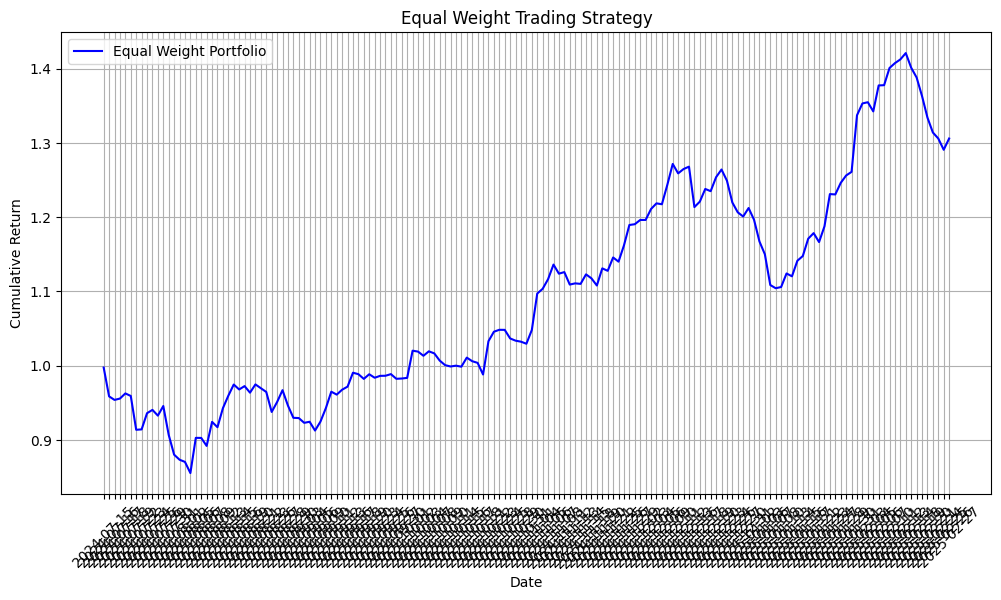

Sharpe Ratio: 1.6192495111977232
Max Drawdown: -14.25%


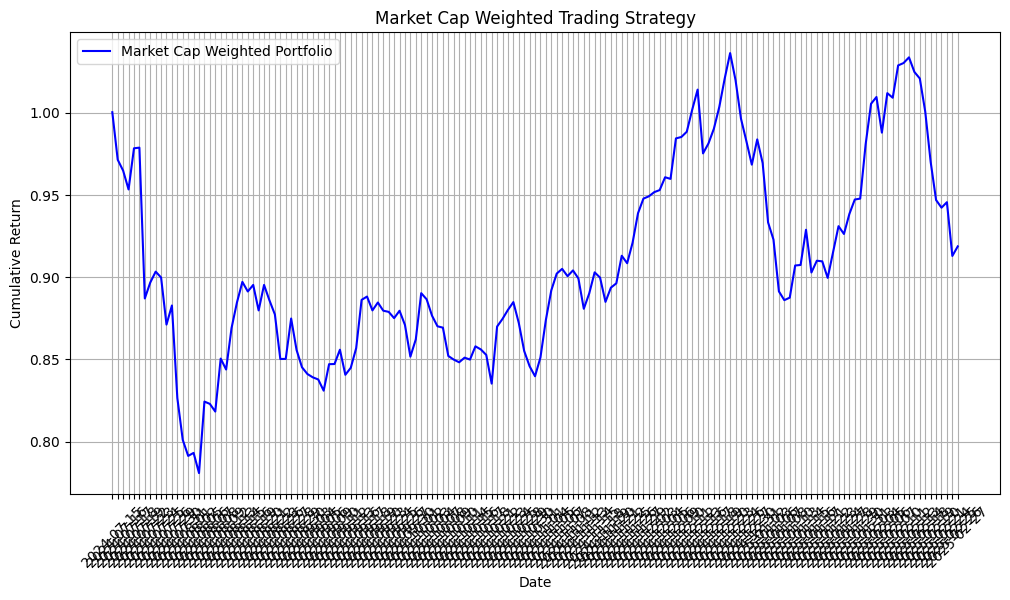

Sharpe Ratio: -0.4389515877859581
Max Drawdown: -21.93%


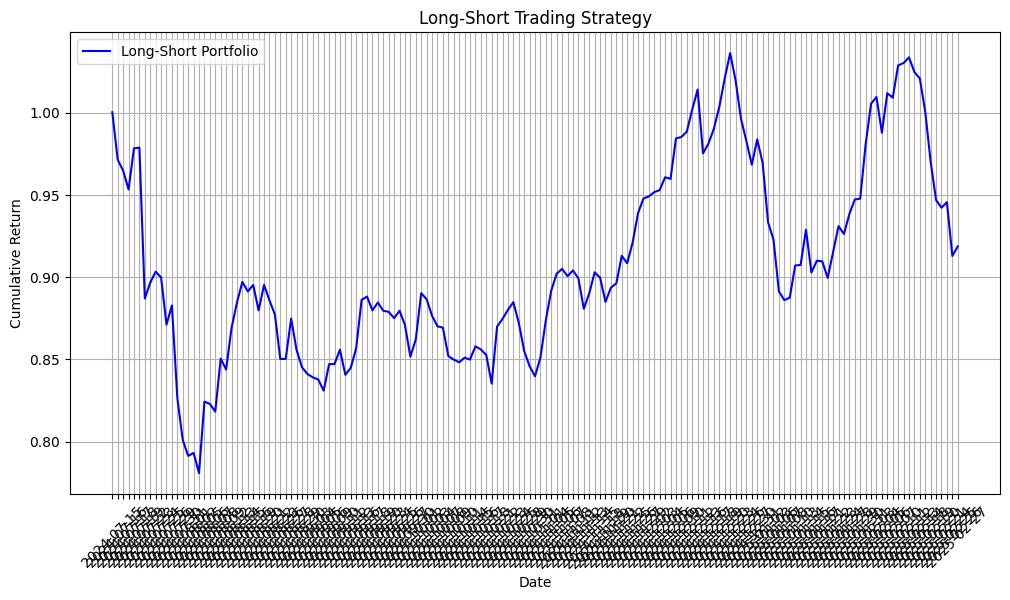

Sharpe Ratio: 0.500618815910564
Max Drawdown: -21.93%


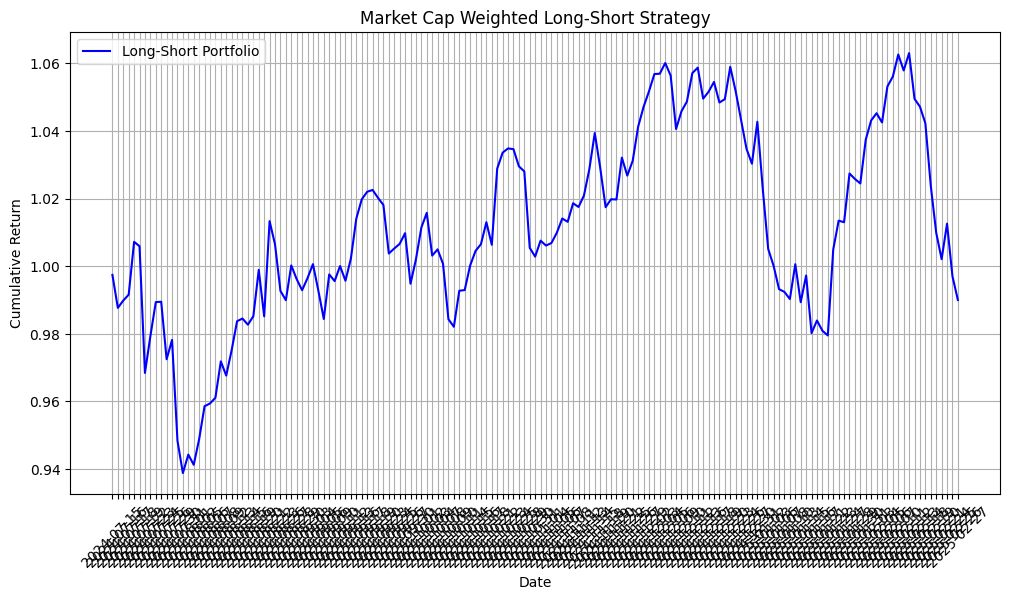

Sharpe Ratio: 1.545061406899754
Max Drawdown: -7.60%


In [339]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Copy the dataset to avoid modifying the original data
# df = df_predictions.copy()
df = pd.read_csv("predictions_1.csv")


# Strategy 1 equal weight strategy
# Selection parameter
TOP_N = 5  # Number of top stocks selected daily
INITIAL_CAPITAL = 1_000_000  # Initial portfolio value in cash
TRADING_COST_RATE = 0.001  # 0.1% trading cost per transaction

def TopN_EqualWeight(df):
    df = df.sort_values(by=['Date'])
    unique_dates = df['Date'].unique()
    portfolio_value = INITIAL_CAPITAL
    portfolio_returns = []
    portfolio_values = []
    prev_positions = {}

    positions_list = []  

    for date in unique_dates:
        daily_data = df[df['Date'] == date]
        top_stocks = daily_data.nlargest(TOP_N, 'Predicted_Return')
        tickers = top_stocks['Ticker'].values
        prices = top_stocks['Price'].values
        
        # Equal weight allocation
        weights = np.ones(TOP_N) / TOP_N  # Equal allocation
        allocation = portfolio_value * weights
        new_positions = {ticker: alloc / price for ticker, alloc, price in zip(tickers, allocation, prices)}
        
        # Compute trading cost
        trading_cost = 0
        for ticker, new_shares in new_positions.items():
            prev_shares = prev_positions.get(ticker, 0)
            trading_cost += abs(new_shares - prev_shares) * prices[list(tickers).index(ticker)] * TRADING_COST_RATE
        
        for ticker, prev_shares in prev_positions.items():
            if ticker not in new_positions:
                last_price = df[(df['Date'] == date) & (df['Ticker'] == ticker)]['Price'].values
                if len(last_price) > 0:
                    trading_cost += abs(prev_shares) * last_price[0] * TRADING_COST_RATE
                    
        # Compute portfolio return based on price changes
        actual_returns = top_stocks['Actual_Return'].values
        portfolio_return = np.sum(weights * actual_returns)
        
        # Update portfolio value
        portfolio_value *= (1 + portfolio_return)
        portfolio_value -= trading_cost
        prev_positions = new_positions
        
        portfolio_returns.append(portfolio_return)
        portfolio_values.append(portfolio_value)

        for ticker, alloc in zip(tickers, allocation):
            weight = np.ones(TOP_N) / TOP_N # alloc / portfolio_value  
            positions_list.append({'Date': date, 'Ticker': ticker, 'Allocation': alloc, 'Weight': weight})

    positions_df = pd.DataFrame(positions_list)
    
    # store required data
    positions_df.to_csv('TopN_EqualWeight_position.csv', index=False)

    # backtest result
    results = pd.DataFrame({'Date': unique_dates, 'Portfolio_Value': portfolio_values, 'Portfolio_Return': portfolio_returns})
    results['Cumulative_Return'] = results['Portfolio_Value'] / INITIAL_CAPITAL
    return results


results = TopN_EqualWeight(df)

plt.figure(figsize=(12, 6))
plt.plot(results['Date'], results['Cumulative_Return'], label='Equal Weight Portfolio', color='b')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.title('Equal Weight Trading Strategy')
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()


# Compute performance metrics
risk_free_rate = 0.04 / 252
epsilon = 1e-8
portfolio_daily_returns = results['Cumulative_Return'].pct_change().dropna()
excess_returns = portfolio_daily_returns - risk_free_rate
sharpe_ratio = (excess_returns.mean() / (excess_returns.std() + epsilon)) * np.sqrt(252)

max_drawdown = (results['Cumulative_Return'] / results['Cumulative_Return'].cummax() - 1).min()

print(f"Sharpe Ratio: {sharpe_ratio}")
print(f"Max Drawdown: {max_drawdown:.2%}")


### Strategy 2 - Market Cap Weighted Trading Strategy
#
# This strategy selects the top N stocks each day based on the highest Predicted_Return.
# The selected stocks are weighted by their Market_Cap to determine portfolio allocation.

# Selection parameter
TOP_N = 5  # Number of top stocks selected daily
INITIAL_CAPITAL = 1_000_000  # Initial portfolio value in cash
TRADING_COST_RATE = 0.001  # 0.1% trading cost per transaction

def TopN(df):
    '''
    Strategy Overview:
        1. Daily rebalancing: Selects top N stocks (configurable TOP_N) each day based on highest predicted returns
        2. Market-cap weighting: Allocates capital proportionally to selected stocks' market capitalizations
        3. Realistic execution: 
            - Calculates position sizes using daily closing prices
            - Applies trading costs (0.1% per trade) for position changes
            - Tracks portfolio value with compounding returns
        4. Key mechanics:
            - Maintains daily position tracking to calculate turnover
            - Uses actual returns (not predictions) for performance calculation
            - Automatically handles missing positions as zero-weight allocations
        5. Output: Calculates cumulative returns, Sharpe ratio, and max drawdown
    '''
    # Ensure data is sorted by date
    df = df.sort_values(by=['Date'])
    unique_dates = df['Date'].unique()
    portfolio_value = INITIAL_CAPITAL  # Track portfolio value
    portfolio_returns = []
    portfolio_values = []
    prev_positions = {}  # Store previous day's holdings

    positions_list = []  

    for date in unique_dates:
        daily_data = df[df['Date'] == date]
        
        # Select top N stocks based on Predicted_Return
        top_stocks = daily_data.nlargest(TOP_N, 'Predicted_Return')
        tickers = top_stocks['Ticker'].values
        prices = top_stocks['Price'].values
        market_caps = top_stocks['Market_Cap'].values
        
        # Compute market cap weighted allocation
        weights = market_caps / np.sum(market_caps)
        allocation = portfolio_value * weights  # Allocate capital based on weight
        new_positions = {ticker: alloc / price for ticker, alloc, price in zip(tickers, allocation, prices)}
        
        # Compute trading cost
        trading_cost = 0
        for ticker, new_shares in new_positions.items():
            prev_shares = prev_positions.get(ticker, 0)
            trading_cost += abs(new_shares - prev_shares) * prices[list(tickers).index(ticker)] * TRADING_COST_RATE
            
        for ticker, prev_shares in prev_positions.items():
            if ticker not in new_positions:
                last_price = df[(df['Date'] == date) & (df['Ticker'] == ticker)]['Price'].values
                if len(last_price) > 0: 
                    trading_cost += abs(prev_shares) * last_price[0] * TRADING_COST_RATE
                    
        # Compute portfolio return based on price changes
        actual_returns = top_stocks['Actual_Return'].values
        portfolio_return = np.sum(weights * actual_returns)
        
        # Update portfolio value
        portfolio_value *= (1 + portfolio_return)
        portfolio_value -= trading_cost  # Deduct trading cost
        prev_positions = new_positions  # Update holdings
        
        portfolio_returns.append(portfolio_return)
        portfolio_values.append(portfolio_value)
        
        total_allocation = np.sum(allocation)
        for ticker, alloc in zip(tickers, allocation):
            weight = weight = alloc / total_allocation # alloc / portfolio_value  
            positions_list.append({'Date': date, 'Ticker': ticker, 'Allocation': alloc, 'Weight': weight})

        positions_df = pd.DataFrame(positions_list)
    
    # store required data
    positions_df.to_csv('TopN_marketcap_position.csv', index=False)
    # Convert results to DataFrame
    results = pd.DataFrame({'Date': unique_dates, 'Portfolio_Value': portfolio_values, 'Portfolio_Return': portfolio_returns})
    results['Cumulative_Return'] = results['Portfolio_Value'] / INITIAL_CAPITAL
    
    return results

# Run backtest
results = TopN(df)

# Plot cumulative return
plt.figure(figsize=(12, 6))
plt.plot(results['Date'], results['Cumulative_Return'], label='Market Cap Weighted Portfolio', color='b')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.title('Market Cap Weighted Trading Strategy')
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()


# Compute performance metrics
risk_free_rate = 0.04 / 252
epsilon = 1e-8  # Small value to avoid division by zero
portfolio_daily_returns = results['Cumulative_Return'].pct_change().dropna() # results['Portfolio_Return']
excess_returns = portfolio_daily_returns - risk_free_rate
sharpe_ratio = (excess_returns.mean() / (excess_returns.std() + epsilon)) * np.sqrt(252)

max_drawdown = (results['Cumulative_Return'] / results['Cumulative_Return'].cummax() - 1).min()

print(f"Sharpe Ratio: {sharpe_ratio}")
print(f"Max Drawdown: {max_drawdown:.2%}")


# Strategy 3 long short strategy - equal weight

# Selection parameter
TOP_N = 5  # Number of top stocks selected daily for long and short
INITIAL_CAPITAL = 1_000_000  # Initial portfolio value
TRADING_COST_RATE = 0.001  # 0.1% trading cost per transaction

def TopN_LongShort(df):
    df = df.sort_values(by=['Date'])
    unique_dates = df['Date'].unique()
    portfolio_returns = []
    portfolio_values = []
    prev_positions = {}
    cumulative_return = 1  # Start at 1 for cumulative return calculation
    position_list = []

    for date in unique_dates:
        daily_data = df[df['Date'] == date]
        top_stocks = daily_data.nlargest(TOP_N, 'Predicted_Return')
        bottom_stocks = daily_data.nsmallest(TOP_N, 'Predicted_Return')
        
        long_tickers = top_stocks['Ticker'].values
        short_tickers = bottom_stocks['Ticker'].values
        long_prices = top_stocks['Price'].values
        short_prices = bottom_stocks['Price'].values
        
        # Equal weight allocation for long and short
        long_weights = np.ones(TOP_N) / TOP_N
        short_weights = np.ones(TOP_N) / TOP_N
        long_allocation = (INITIAL_CAPITAL*cumulative_return / 2) * long_weights  # 50% capital to long
        short_allocation = (INITIAL_CAPITAL*cumulative_return / 2) * short_weights  # 50% capital to short
        
        long_positions = {ticker: alloc / price for ticker, alloc, price in zip(long_tickers, long_allocation, long_prices)}
        short_positions = {ticker: alloc / price for ticker, alloc, price in zip(short_tickers, short_allocation, short_prices)}
        
        # Compute trading cost (including closing positions)
        trading_cost = 0
        for ticker, new_shares in {**long_positions, **short_positions}.items():
            prev_shares = prev_positions.get(ticker, 0)
            price = df[(df['Date'] == date) & (df['Ticker'] == ticker)]['Price'].values
            if len(price) > 0:
                trading_cost += abs(new_shares - prev_shares) * price[0] * TRADING_COST_RATE
        
        for ticker, prev_shares in prev_positions.items():
            if ticker not in long_positions and ticker not in short_positions:
                last_price = df[(df['Date'] == date) & (df['Ticker'] == ticker)]['Price'].values
                if len(last_price) > 0:
                    trading_cost += abs(prev_shares) * last_price[0] * TRADING_COST_RATE
        
        # Compute portfolio return
        long_returns = top_stocks['Actual_Return'].values
        short_returns = bottom_stocks['Actual_Return'].values
        portfolio_return = 0.5 * np.sum(long_weights * long_returns) - 0.5 * np.sum(short_weights * short_returns)

        # Update cumulative return (starting from 1)
        cumulative_return *= (1 + portfolio_return)

        # Deduct trading cost in percentage terms (relative to initial capital)
        cumulative_return *= (1 - trading_cost / INITIAL_CAPITAL)

        portfolio_returns.append(portfolio_return)
        portfolio_values.append(cumulative_return)
                
        # Store position records
        for ticker, weight, position in zip(long_tickers, long_weights, long_positions.values()):
            position_list.append([date, ticker, 'Long', position, weight])
        for ticker, weight, position in zip(short_tickers, short_weights, short_positions.values()):
            position_list.append([date, ticker, 'Short', position, weight])
        
        # Update previous positions
        prev_positions = {**long_positions, **short_positions}
    
    results = pd.DataFrame({'Date': unique_dates, 'Cumulative_Return': portfolio_values, 'Portfolio_Return': portfolio_returns})
    position_df = pd.DataFrame(position_list, columns=['Date', 'Ticker', 'Position_Type', 'Shares', 'Weight'])
    
    # Save results to CSV
    # results.to_csv(output_csv, index=False)
    position_df.to_csv('TopN_LongShort_position.csv', index=False)
    
    return results


# Plot cumulative return
plt.figure(figsize=(12, 6))
plt.plot(results['Date'], results['Cumulative_Return'], label='Long-Short Portfolio', color='b')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.title('Long-Short Trading Strategy')
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()

# Compute performance metrics
risk_free_rate = 0.04 / 252
epsilon = 1e-8
portfolio_daily_returns = results['Portfolio_Return']
excess_returns = portfolio_daily_returns - risk_free_rate
sharpe_ratio = (excess_returns.mean() / (excess_returns.std() + epsilon)) * np.sqrt(252)

max_drawdown = (results['Cumulative_Return'] / results['Cumulative_Return'].cummax() - 1).min()

print(f"Sharpe Ratio: {sharpe_ratio}")
print(f"Max Drawdown: {max_drawdown:.2%}")

# Selection parameter
TOP_N = 5  # Number of top stocks selected daily for long and short
INITIAL_CAPITAL = 1_000_000  # Initial portfolio value
TRADING_COST_RATE = 0.001  # 0.1% trading cost per transaction

def TopN_LongShort_Marketcap(df):
    df = df.sort_values(by=['Date'])
    unique_dates = df['Date'].unique()
    portfolio_returns = []
    portfolio_values = []
    prev_positions = {}
    cumulative_return = 1  # Start at 1 for cumulative return calculation
    position_list = []
    
    for date in unique_dates:
        daily_data = df[df['Date'] == date]

        # Select top & bottom N stocks by predicted return
        top_stocks = daily_data.nlargest(TOP_N, 'Predicted_Return')
        bottom_stocks = daily_data.nsmallest(TOP_N, 'Predicted_Return')

        # Extract tickers, prices, and market caps
        long_tickers = top_stocks['Ticker'].values
        short_tickers = bottom_stocks['Ticker'].values
        long_prices = top_stocks['Price'].values
        short_prices = bottom_stocks['Price'].values
        long_market_caps = top_stocks['Market_Cap'].values
        short_market_caps = bottom_stocks['Market_Cap'].values

        # Compute market cap weights
        long_weights = long_market_caps / np.sum(long_market_caps)
        short_weights = short_market_caps / np.sum(short_market_caps)

        # Capital allocation (50% long, 50% short)
        long_allocation = (INITIAL_CAPITAL*cumulative_return / 2) * long_weights  # 50% capital to long
        short_allocation = (INITIAL_CAPITAL*cumulative_return / 2) * short_weights  # 50% capital to short

        # Compute positions
        long_positions = {ticker: alloc / price for ticker, alloc, price in zip(long_tickers, long_allocation, long_prices)}
        short_positions = {ticker: alloc / price for ticker, alloc, price in zip(short_tickers, short_allocation, short_prices)}

        # Compute trading cost
        trading_cost = 0
        for ticker, new_shares in {**long_positions, **short_positions}.items():
            prev_shares = prev_positions.get(ticker, 0)
            price = df[(df['Date'] == date) & (df['Ticker'] == ticker)]['Price'].values
            if len(price) > 0:
                trading_cost += abs(new_shares - prev_shares) * price[0] * TRADING_COST_RATE

        # Closing positions cost
        for ticker, prev_shares in prev_positions.items():
            if ticker not in long_positions and ticker not in short_positions:
                last_price = df[(df['Date'] == date) & (df['Ticker'] == ticker)]['Price'].values
                if len(last_price) > 0:
                    trading_cost += abs(prev_shares) * last_price[0] * TRADING_COST_RATE

        # Compute portfolio return (market cap weighted)
        long_returns = top_stocks['Actual_Return'].values
        short_returns = bottom_stocks['Actual_Return'].values
        portfolio_return = 0.5 * np.sum(long_weights * long_returns) - 0.5 * np.sum(short_weights * short_returns)

        
        # Update cumulative return
        cumulative_return *= (1 + portfolio_return)

        # Deduct trading cost relative to current portfolio value
        cumulative_return *= (1 - trading_cost / INITIAL_CAPITAL) 

        portfolio_returns.append(portfolio_return)
        portfolio_values.append(cumulative_return)

        # Store position records
        for ticker, weight, position in zip(long_tickers, long_weights, long_positions.values()):
            position_list.append([date, ticker, 'Long', position, weight])
        for ticker, weight, position in zip(short_tickers, short_weights, short_positions.values()):
            position_list.append([date, ticker, 'Short', position, weight])
            
        # Update previous positions
        prev_positions = {**long_positions, **short_positions}

    results = pd.DataFrame({'Date': unique_dates, 'Cumulative_Return': portfolio_values, 'Portfolio_Return': portfolio_returns})
    position_df = pd.DataFrame(position_list, columns=['Date', 'Ticker', 'Position_Type', 'Shares', 'Weight'])
    
    # Save results to CSV
    # results.to_csv(output_csv, index=False)
    position_df.to_csv('TopN_LongShort_Marketcap_position.csv', index=False)
    
    return results



results = TopN_LongShort_Marketcap(df)

# Plot cumulative return
plt.figure(figsize=(12, 6))
plt.plot(results['Date'], results['Cumulative_Return'], label='Long-Short Portfolio', color='b')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.title('Market Cap Weighted Long-Short Strategy')
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()

# Compute performance metrics
risk_free_rate = 0.04 / 252
epsilon = 1e-8
portfolio_daily_returns = results['Portfolio_Return']
excess_returns = portfolio_daily_returns - risk_free_rate
sharpe_ratio = (excess_returns.mean() / (excess_returns.std() + epsilon)) * np.sqrt(252)
max_drawdown = (results['Cumulative_Return'] / results['Cumulative_Return'].cummax() - 1).min()

print(f"Sharpe Ratio: {sharpe_ratio}")
print(f"Max Drawdown: {max_drawdown:.2%}")
